# Exercise on decision tree (CART)

## Import data

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loc ="http://archive.ics.uci.edu/ml/machine-learning-databases/"
ds  ="breast-cancer-wisconsin/breast-cancer-wisconsin.data"
url =loc+ds
data=pd.read_csv(url,sep=",",header=None)

In [3]:
data.columns =["ID", "clumpThickness", "sizeUniformity",
                   "shapeUniformity", "maginalAdhesion", 
                   "singleEpithelialCellSize", "bareNuclei", 
                   "blandChromatin", "normalNucleoli", "mitosis", "class"]

## EDA and data cleaning

In [4]:
#To determine the number of rows and columns
data.shape

(699, 11)

In [5]:
data.head()

,ID,clumpThickness,sizeUniformity,shapeUniformity,maginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
#To determine the frequency of the attributes class
from collections import Counter
Counter(data.iloc[:,-1].values)

Counter({2: 458, 4: 241})

In [7]:
Counter(data["class"])

Counter({2: 458, 4: 241})

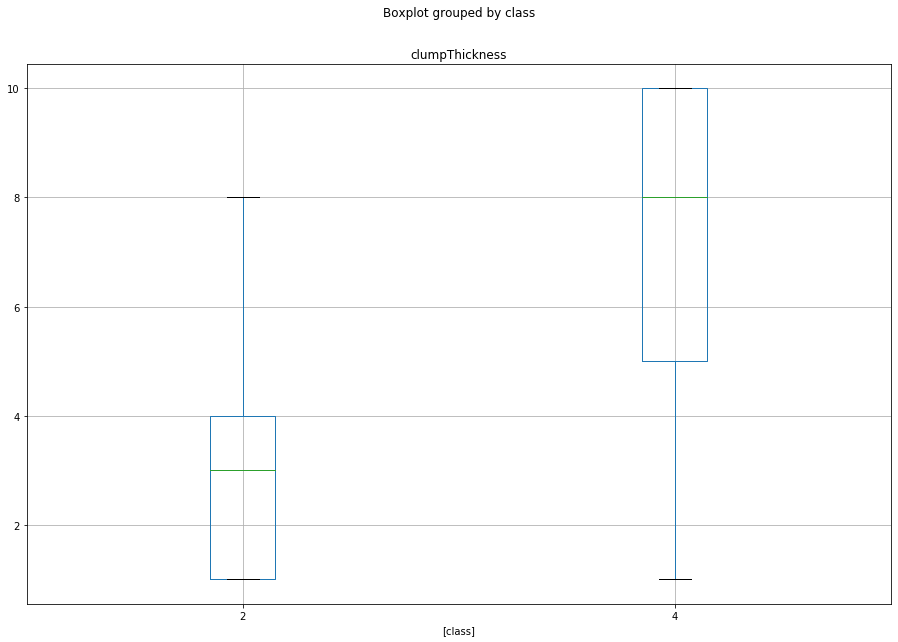

In [20]:
f1, ax = plt.subplots(figsize = (15,10))
data.boxplot(ax=ax,column=["clumpThickness"],by=["class"])
plt.show()

In [21]:
data.isnull().sum()

ID                          0
clumpThickness              0
sizeUniformity              0
shapeUniformity             0
maginalAdhesion             0
singleEpithelialCellSize    0
bareNuclei                  0
blandChromatin              0
normalNucleoli              0
mitosis                     0
class                       0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        699 non-null    int64 
 1   clumpThickness            699 non-null    int64 
 2   sizeUniformity            699 non-null    int64 
 3   shapeUniformity           699 non-null    int64 
 4   maginalAdhesion           699 non-null    int64 
 5   singleEpithelialCellSize  699 non-null    int64 
 6   bareNuclei                699 non-null    object
 7   blandChromatin            699 non-null    int64 
 8   normalNucleoli            699 non-null    int64 
 9   mitosis                   699 non-null    int64 
 10  class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [23]:
len(data[data.bareNuclei=="?"])

16

In [24]:
Counter(data[data.bareNuclei=="?"]["class"])

Counter({4: 2, 2: 14})

In [25]:
data["bareNuclei"]=data["bareNuclei"].replace(["?"],np.nan)

In [26]:
data.isnull().sum()

ID                           0
clumpThickness               0
sizeUniformity               0
shapeUniformity              0
maginalAdhesion              0
singleEpithelialCellSize     0
bareNuclei                  16
blandChromatin               0
normalNucleoli               0
mitosis                      0
class                        0
dtype: int64

## Impute missing values in any of the columns with the median value

In [30]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr=imr.fit(data.values)
imputed_data=imr.transform(data.values)
data=pd.DataFrame(imputed_data,index=data.index,columns=data.columns)

C:\Users\vlee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
#data=data.dropna(axis=1)

In [31]:
feature_list=data.columns[1:-1]
class_list=["benign", "malignant"]

## Data spliting

In [32]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [33]:
X[:10,:]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.],
       [ 8., 10., 10.,  8.,  7., 10.,  9.,  7.,  1.],
       [ 1.,  1.,  1.,  1.,  2., 10.,  3.,  1.,  1.],
       [ 2.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  5.],
       [ 4.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.]])

In [34]:
X_train[:10,:]

array([[ 3.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5., 10.,  8., 10.,  8., 10.,  3.,  6.,  3.],
       [ 3.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 3.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.],
       [ 5.,  7.,  4.,  1.,  6.,  1.,  7., 10.,  3.],
       [ 5.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 8.,  6.,  5.,  4.,  3., 10.,  6.,  1.,  1.],
       [ 7.,  2.,  4.,  1.,  3.,  4.,  3.,  3.,  1.]])

In [35]:
y_train[:10]

array([2., 2., 4., 2., 2., 4., 2., 2., 4., 4.])

In [36]:
Counter(data["class"])

Counter({2.0: 458, 4.0: 241})

In [37]:
Counter(y_train)

Counter({2.0: 320, 4.0: 169})

In [38]:
Counter(y_test)

Counter({2.0: 138, 4.0: 72})

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [43]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
import os
os.chdir("C:/output")

In [45]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

Dot_Image=export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=feature_list,
        class_names=class_list,
        rounded=True,
        filled=True
    )

graph = graph_from_dot_data(Dot_Image) 
graph.write_png('Exercise_decision_tree1.png') 

True

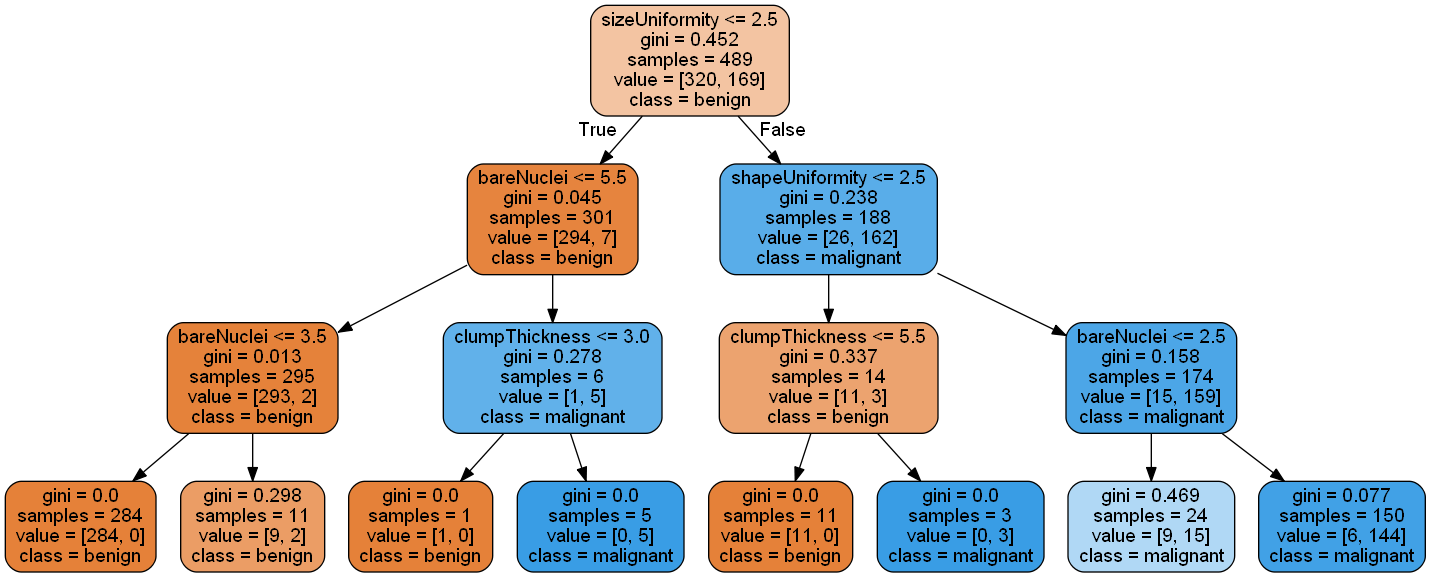

In [46]:
from IPython.display import Image
Image(filename='Exercise_decision_tree1.png', width=700) 

In [47]:
y_predict=tree_clf.predict(X_test)

## To evaluate the performance of the classification model

In [48]:
pd.crosstab(y_test,y_predict,rownames=["Actual class"],colnames=["Predicted class"])

Predicted class,2.0,4.0
Actual class,,
2.0,130,8
4.0,4,68


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         2.0       0.97      0.94      0.96       138
         4.0       0.89      0.94      0.92        72

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210

